In [26]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
from random import randint, choice

import sys
sys.path.insert(0, '../SOM-LVQ')
import minisom
import SOM_LVQ
from supervisedSom import supervisedSom

In [27]:
data = pd.read_csv(r"../data/SD-2X_rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y [y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [28]:
x_train1 = x_train[0:331]
x_train2 = x_train[332:663]
x_train3 = x_train[664:995]

y_train1 = y_train[0:331]
y_train2 = y_train[332:663]
y_train3 = y_train[664:995]

In [29]:
epsilon = 0.9
epsilon_dec_factor = 0.001

In [30]:
# Training the SOM
from minisom import MiniSom
som1 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train1)
som1.train_random(data = x_train1, num_iteration = 100)

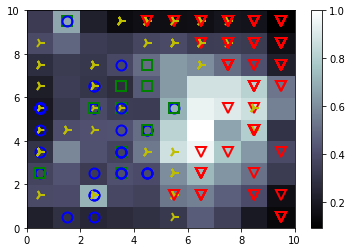

In [31]:
suso1 = supervisedSom(som1, x_train1, y_train1)

label1= suso1.visualSom()

In [32]:
taggings1 = suso1.taggingSom()

p_vectors = SOM_LVQ.init_LVQ_pvectors(som1, taggings1, x_train1, y_train1)
print("class id \t Initial prototype vector \n")
for i in range(som1.x):
    for j in range(som1.y):
        print(p_vectors[i][j].class_id, '\t', p_vectors[i][j].p_vector)

class id 	 Initial prototype vector 

2.0 	 [0.29397719 0.48054649 0.32916789 0.5529721  0.19361227 0.48066322]
3.0 	 [0.31309705 0.41304036 0.46863067 0.52200592 0.33476818 0.35664166]
2.0 	 [0.23676058 0.40949802 0.36728719 0.5720931  0.18439478 0.52921071]
3.0 	 [0.3277292  0.48199926 0.35190415 0.5724672  0.2784375  0.36219831]
3.0 	 [0.31931254 0.48691883 0.30645346 0.59824027 0.2497067  0.3831331 ]
3.0 	 [0.30438056 0.48572605 0.22187101 0.60641912 0.21235423 0.45755597]
3.0 	 [0.33481853 0.47193745 0.25398326 0.60091122 0.29074336 0.39374878]
3.0 	 [0.34716016 0.43843396 0.32303497 0.57234964 0.34905948 0.36534541]
3.0 	 [0.32630022 0.42015793 0.38590058 0.54820136 0.34263654 0.38749412]
2.0 	 [0.28649439 0.3673528  0.51068284 0.48234697 0.37137285 0.38935784]
2.0 	 [0.2853711  0.40160381 0.44598389 0.53687091 0.2546531  0.45309769]
3.0 	 [0.22894117 0.40541295 0.49136265 0.49312787 0.21710458 0.50147735]
3.0 	 [0.24202368 0.39049296 0.49120183 0.51307976 0.19882573 0.49485154]


In [33]:
lvq1 = SOM_LVQ.SOM_LVQ(x_train1, y_train1, n_classes=4, n_neurons=25, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq1.fit(x_train1, y_train1)

In [34]:
len(lvq1.win_map_LVQ(x_train1))

35

In [35]:
predicted_y1 = [lvq1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97       138
          1       0.91      0.87      0.89        55
          2       0.76      0.57      0.65        28
          3       0.87      0.94      0.90       108

avg / total       0.91      0.91      0.91       329



In [51]:
x_test.shape

(329, 6)

In [36]:
data_new = pd.read_csv(r"../data/SD-3X_rocktype.csv")
x_new = data_new.iloc[:, 0:6].values
y_new = data_new.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)
predicted_y_new = [lvq1.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.80      0.99      0.88       331
          1       0.95      0.39      0.55        95
          2       0.19      0.54      0.28        26
          3       0.88      0.58      0.70       205

avg / total       0.82      0.76      0.75       657



In [37]:
# Training the SOM
from minisom import MiniSom
som2 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som2.random_weights_init(x_train2)
som2.train_random(data = x_train2, num_iteration = 100)

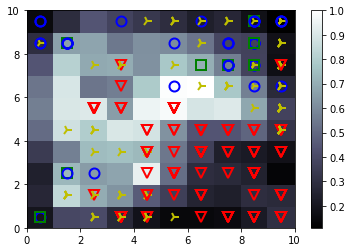

In [38]:
suso2 = supervisedSom(som2, x_train2, y_train2)

label2= suso2.visualSom()

In [39]:
taggings2 = suso2.taggingSom()

p_vectors = SOM_LVQ.init_LVQ_pvectors(som2, taggings2, x_train2, y_train2)
print("class id \t Initial prototype vector \n")
for i in range(som2.x):
    for j in range(som2.y):
        print(p_vectors[i][j].class_id, '\t', p_vectors[i][j].p_vector)

class id 	 Initial prototype vector 

1.0 	 [0.27602448 0.38951927 0.48998331 0.46181562 0.17862694 0.53555609]
3.0 	 [0.24983053 0.35729108 0.55377856 0.47086933 0.23919162 0.47363123]
3.0 	 [0.24324803 0.35106493 0.55009976 0.4748591  0.2239618  0.48920754]
2.0 	 [0.25739708 0.34093367 0.554642   0.4888257  0.29069568 0.43177389]
2.0 	 [0.26659589 0.32779204 0.54549038 0.51834063 0.30369877 0.40374411]
2.0 	 [0.19375137 0.31557879 0.5816959  0.49409829 0.16448359 0.50330145]
2.0 	 [0.27728072 0.34164822 0.52344079 0.53913395 0.19137643 0.45289214]
2.0 	 [0.32373311 0.41248527 0.4071079  0.56541421 0.23129304 0.4314235 ]
3.0 	 [0.35275852 0.41362374 0.37116248 0.5830744  0.22983322 0.41703258]
2.0 	 [0.32882602 0.35729285 0.49340403 0.53873231 0.23042274 0.42123697]
2.0 	 [0.27814497 0.34825223 0.45698425 0.49343247 0.26204625 0.52950666]
3.0 	 [0.17600662 0.29793037 0.66755402 0.41629143 0.17407847 0.48065468]
1.0 	 [0.17068686 0.31565736 0.50916274 0.45661027 0.16606139 0.61311532]


In [40]:
lvq2 = SOM_LVQ.SOM_LVQ(x_train2, y_train2, n_classes=4, n_neurons=25, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq2.fit(x_train2, y_train2)

In [41]:
predicted_y2 = [lvq2.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.91      0.88      0.90       331
          1       1.00      0.55      0.71        95
          2       0.30      0.35      0.32        26
          3       0.69      0.86      0.77       205

avg / total       0.83      0.81      0.81       657



In [42]:
# Training the SOM
from minisom import MiniSom
som3 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som3.random_weights_init(x_train3)
som3.train_random(data = x_train3, num_iteration = 100)

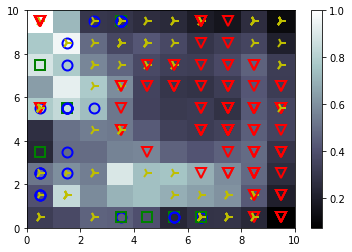

In [43]:
suso3 = supervisedSom(som3, x_train3, y_train3)

label3= suso3.visualSom()

In [44]:
taggings3 = suso3.taggingSom()

p_vectors = SOM_LVQ.init_LVQ_pvectors(som3, taggings3, x_train3, y_train3)
print("class id \t Initial prototype vector \n")
for i in range(som3.x):
    for j in range(som3.y):
        print(p_vectors[i][j].class_id, '\t', p_vectors[i][j].p_vector)

class id 	 Initial prototype vector 

3.0 	 [0.27851421 0.5710669  0.40564705 0.44357729 0.25030801 0.41514815]
2.0 	 [0.27305234 0.41660201 0.47823257 0.49784426 0.22081049 0.47599645]
3.0 	 [0.18421959 0.33380977 0.63328391 0.40577561 0.16316889 0.51215988]
1.0 	 [0.24209038 0.36638118 0.54467574 0.44206471 0.19019991 0.52809867]
3.0 	 [0.22243581 0.34668712 0.56490063 0.46608324 0.19511794 0.50587848]
3.0 	 [0.14177409 0.2573988  0.72236905 0.39127237 0.1449902  0.46659693]
3.0 	 [0.19522057 0.38375529 0.35352124 0.55124071 0.15260802 0.60206978]
1.0 	 [0.16932816 0.38284201 0.16479094 0.57612865 0.08377792 0.67724512]
2.0 	 [0.25825088 0.39071922 0.43706364 0.55411831 0.2416789  0.47346019]
0.0 	 [0.12101593 0.16836737 0.89699737 0.24910861 0.13595209 0.26807688]
3.0 	 [0.32710106 0.38701873 0.45686336 0.52825491 0.3277517  0.38473737]
3.0 	 [0.27535047 0.40450814 0.42136747 0.50850127 0.24352245 0.51490583]
2.0 	 [0.28808004 0.36012423 0.5591675  0.43237422 0.26404367 0.4668893 ]


In [45]:
lvq3 = SOM_LVQ.SOM_LVQ(x_train3, y_train3, n_classes=4, n_neurons=25, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq3.fit(x_train3, y_train3)

In [46]:
predicted_y3 = [lvq3.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y3, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.88      0.80      0.84       331
          1       0.98      0.52      0.68        95
          2       0.08      0.15      0.11        26
          3       0.66      0.82      0.73       205

avg / total       0.79      0.74      0.75       657



In [47]:
ensemble = [np.asarray(predicted_y_new), np.asarray(predicted_y2), np.asarray(predicted_y3)]

In [48]:
len(ensemble[0])

657

In [49]:
predict = [np.bincount([ensemble[j][i] for j in range(3)]).argmax() for i in range(len(ensemble[1]))]

In [50]:
print (classification_report(y_new, predict, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90       331
          1       0.96      0.56      0.71        95
          2       0.11      0.19      0.14        26
          3       0.77      0.79      0.78       205

avg / total       0.83      0.80      0.80       657

